In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import lasio

In [2]:
las = lasio.read(r"C:\Users\HAFS\Desktop\Hafs Pyprograms\well log\Dharmatttan\LOGS\Jay 03.LAS")

In [4]:
df = las.df()
df.reset_index(inplace = True)
df.rename(columns= {"DEPT":"DEPTH", "GR_CED":"GR", "NEUSS_CED":"NEU", "RESD_CED":"RES", "RHOB_CED": "DEN"}, inplace = True)
df.head()

,DEPTH,GR,NEU,RES,DEN,PHIE,SW,VSH
0,6650.0,89.141701,0.3266,7.6452,2.1403,0.1018,0.9605,0.4093
1,6650.5,97.252296,0.3388,7.1759,2.1160,0.0319,0.9494,0.5143
2,6651.0,107.615700,0.3465,6.8020,2.1150,0.0000,0.9578,0.6898
3,6651.5,108.418297,0.3505,6.5414,2.1226,0.0000,0.9773,0.7060
4,6652.0,103.789497,0.3519,6.2849,2.1313,0.0000,0.9999,0.6183


(7300.0, 6650.0)

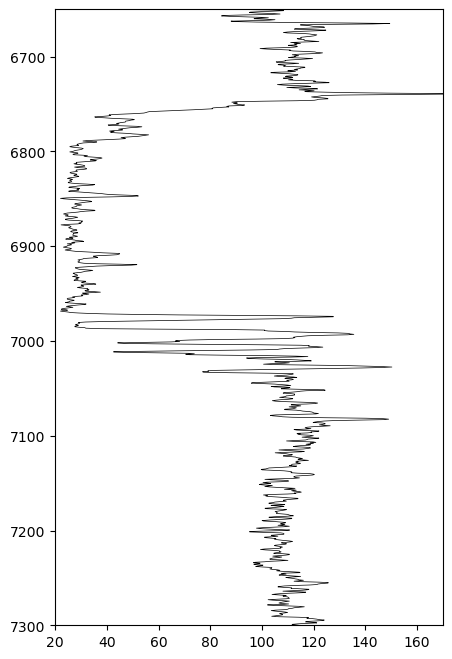

In [9]:
plt.figure(figsize = (5, 8))

plt.plot(df["GR"], df["DEPTH"], color = "black", lw = 0.5)

plt.xlim(20, 170)
plt.ylim(7300, 6650)

(7300.0, 6650.0)

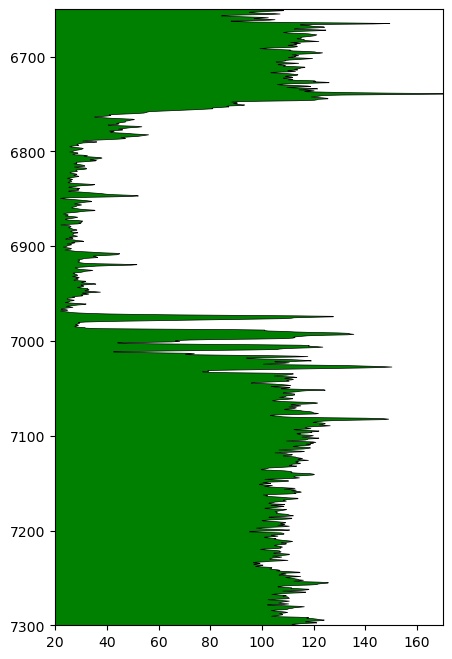

In [13]:
plt.figure(figsize = (5, 8))

plt.plot(df["GR"], df["DEPTH"], color = "black", lw = 0.5)

# Add fill_betweenx to left
plt.fill_betweenx(df["DEPTH"], 0, df["GR"], facecolor = "green")

plt.xlim(20, 170)
plt.ylim(7300, 6650)

(7300.0, 6650.0)

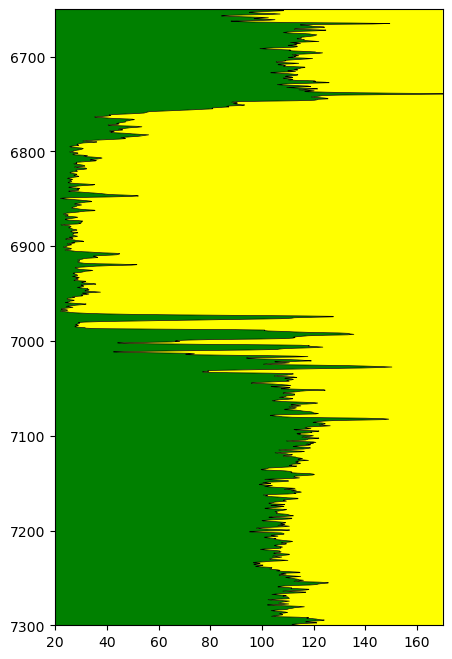

In [12]:
plt.figure(figsize = (5, 8))

plt.plot(df["GR"], df["DEPTH"], color = "black", lw = 0.5)

# Add fill_betweenx to left
plt.fill_betweenx(df["DEPTH"], 0, df["GR"], facecolor = "green")
# Add fill_betweenx to right
plt.fill_betweenx(df["DEPTH"], df["GR"], 170, facecolor = "yellow")

plt.xlim(20, 170)
plt.ylim(7300, 6650)

(7300.0, 6650.0)

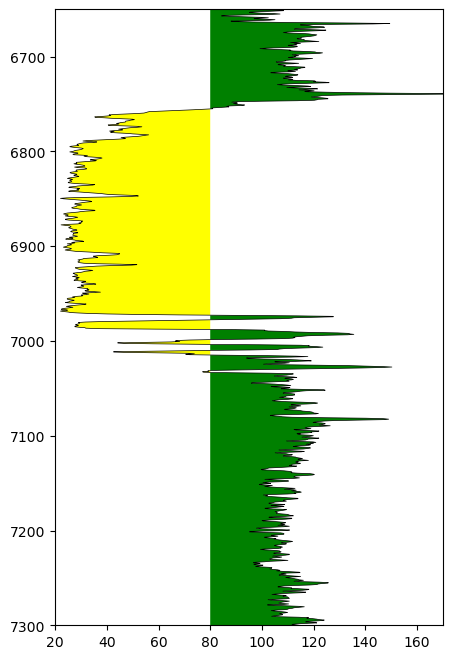

In [15]:
plt.figure(figsize = (5, 8))

plt.plot(df["GR"], df["DEPTH"], color = "black", lw = 0.5)

# Using the where argument to fill to a fixed value
plt.fill_betweenx(df["DEPTH"], 80, df["GR"], where = df["GR"] <= 80, facecolor = "yellow")
plt.fill_betweenx(df["DEPTH"], df["GR"], 80,  where = df["GR"]>= 80, facecolor = "green")

plt.xlim(20, 170)
plt.ylim(7300, 6650)

In [20]:
# setup plot values & color_index

left_value = 0
right_value = 170
span = abs(left_value - right_value)

cmap = plt.get_cmap("hot_r") # hot_r is reverse
color_index = np.arange(left_value, right_value, span/100)

In [21]:
color_index

array([  0. ,   1.7,   3.4,   5.1,   6.8,   8.5,  10.2,  11.9,  13.6,
        15.3,  17. ,  18.7,  20.4,  22.1,  23.8,  25.5,  27.2,  28.9,
        30.6,  32.3,  34. ,  35.7,  37.4,  39.1,  40.8,  42.5,  44.2,
        45.9,  47.6,  49.3,  51. ,  52.7,  54.4,  56.1,  57.8,  59.5,
        61.2,  62.9,  64.6,  66.3,  68. ,  69.7,  71.4,  73.1,  74.8,
        76.5,  78.2,  79.9,  81.6,  83.3,  85. ,  86.7,  88.4,  90.1,
        91.8,  93.5,  95.2,  96.9,  98.6, 100.3, 102. , 103.7, 105.4,
       107.1, 108.8, 110.5, 112.2, 113.9, 115.6, 117.3, 119. , 120.7,
       122.4, 124.1, 125.8, 127.5, 129.2, 130.9, 132.6, 134.3, 136. ,
       137.7, 139.4, 141.1, 142.8, 144.5, 146.2, 147.9, 149.6, 151.3,
       153. , 154.7, 156.4, 158.1, 159.8, 161.5, 163.2, 164.9, 166.6,
       168.3])

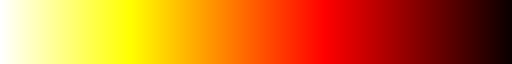

In [22]:
cmap

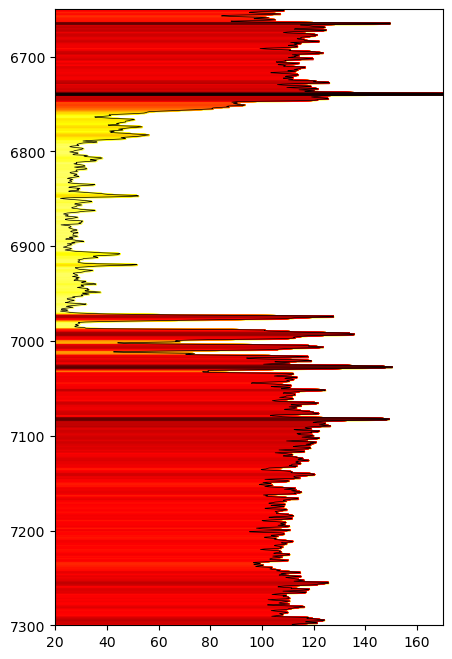

In [27]:
plt.figure(figsize = (5, 8))

plt.plot(df["GR"], df["DEPTH"], color = "black", lw = 0.5)

plt.xlim(20, 170)
plt.ylim(7300, 6650)

for index in sorted(color_index):
    index_value = (index - left_value)/span
    color = cmap(index_value)
    plt.fill_betweenx(df["DEPTH"], left_value, df["GR"], where = df["GR"] >= index, color = color)
    # color applies to both lines and filled areas

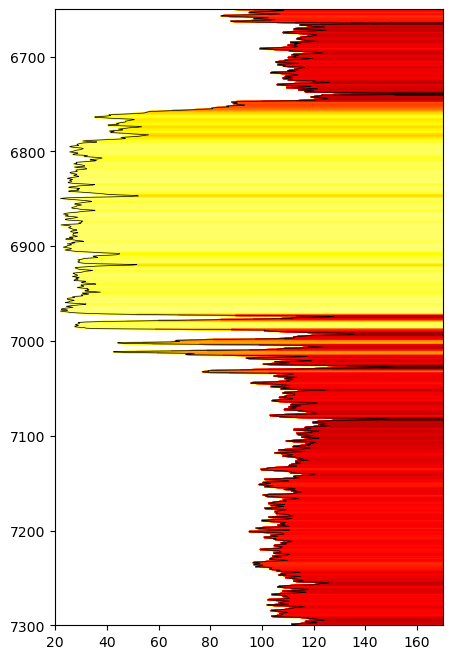

In [28]:
plt.figure(figsize = (5, 8))

plt.plot(df["GR"], df["DEPTH"], color = "black", lw = 0.5)

plt.xlim(20, 170)
plt.ylim(7300, 6650)

for index in sorted(color_index):
    index_value = (index - left_value)/span
    color = cmap(index_value)
    plt.fill_betweenx(df["DEPTH"], right_value, df["GR"], where = df["GR"] >= index, color = color) # To the right